# **SESSION 12 PRACTICAL APPLICATION ON CLUSTERING**
============================================================================================================================================
- Date: 10/03/2023
- Student: Pablo Ostos Bollmann
- Professor: Pablo Gervás
- Master: MCSBT

============================================================================================================================================

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.metrics import silhouette_score, adjusted_rand_score, pairwise_distances_argmin

#models
from sklearn.cluster import AgglomerativeClustering # this line of code imports AgglomerativeClustering model from sk-learn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
import scipy.cluster.hierarchy as sc
from kneed import KneeLocator


# **IRIS**

## **Loads a data set**

In [2]:
# Load the Diabetes dataset
columns = "sepal_length sepal_width petal_length petal_width".split() # Declare the columns names
iris = datasets.load_iris() # Call the diabetes dataset from sklearn
iris_df = pd.DataFrame(iris.data, columns=columns) # load the dataset as a pandas data frame
iris_y = iris.target # define the target variable (dependent variable) as y

In [3]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **Iris plottings**

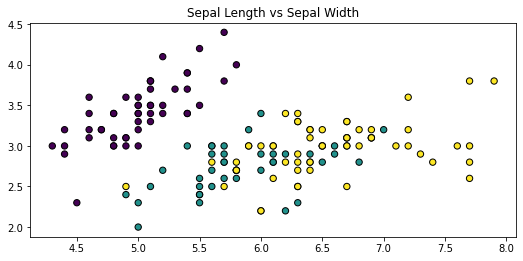

In [4]:
# Plotting the dataset
plt.figure(figsize=(7.50, 3.50))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
plt.subplot(111)
plt.title("Sepal Length vs Sepal Width", fontsize="12")
plt.scatter(iris_df['sepal_length'], iris_df['sepal_width'], marker="o", c=iris_y, s=40, edgecolor="k")
plt.show()

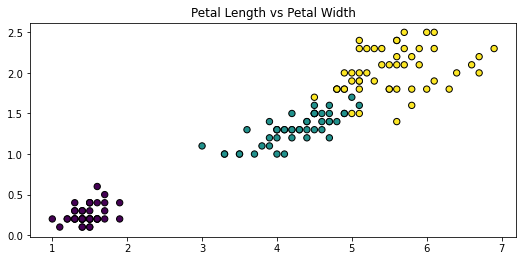

In [5]:
# Plotting the dataset
plt.figure(figsize=(7.50, 3.50))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
plt.subplot(111)
plt.title("Petal Length vs Petal Width", fontsize="12")
plt.scatter(iris_df['petal_length'], iris_df['petal_width'], marker="o", c=iris_y, s=40, edgecolor="k")
plt.show()

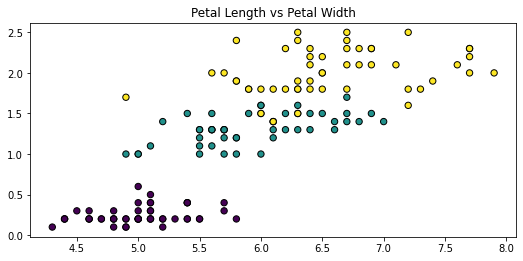

In [6]:
# Plotting the dataset
plt.figure(figsize=(7.50, 3.50))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
plt.subplot(111)
plt.title("Petal Length vs Petal Width", fontsize="12")
plt.scatter(iris_df['sepal_length'], iris_df['petal_width'], marker="o", c=iris_y, s=40, edgecolor="k")
plt.show()

With the three plottings above, we can see that the classes are well distributed according to the different features. This indicates that these features might be significant for the classification.

### **Iris dendrogram**

Text(0, 0.5, 'Euclidean distance')

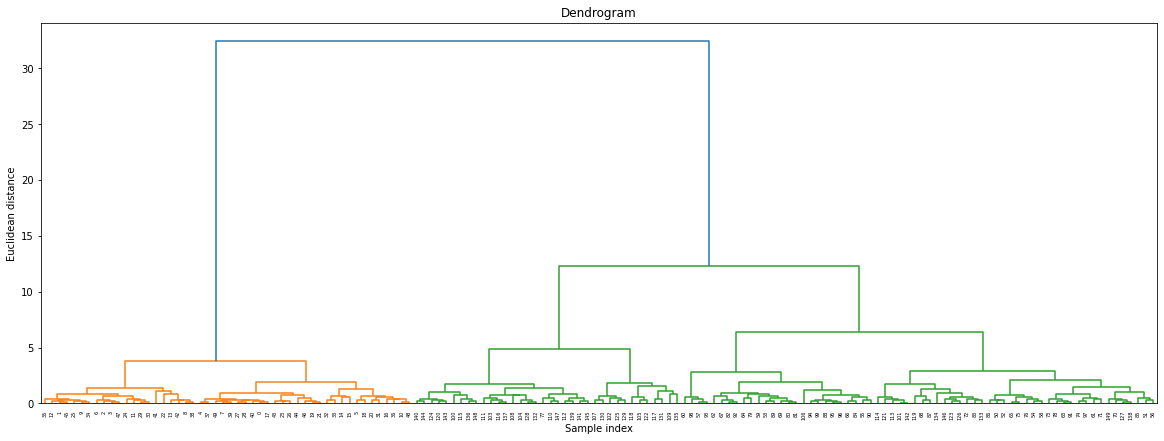

In [7]:
# Plot dendrogram
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  

# Create dendrogram
sc.dendrogram(sc.linkage(iris_df, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

We generate a dendrogram using the dendrogram function from the scipy.cluster.hierarchy module, which takes as input the linkage matrix and some optional parameters to control the appearance of the dendrogram. The resulting dendrogram shows the hierarchical structure of the Iris dataset, with the samples grouped into clusters based on their similarity

## **Agglomerative Clustering**

Agglomerative clustering is a type of hierarchical clustering algorithm used in unsupervised machine learning. The goal of clustering is to group similar data points together based on their features or attributes. Agglomerative clustering is a bottom-up approach, starting with each data point as its own cluster and then merging clusters based on their similarity.

In [8]:
iris_AC = AgglomerativeClustering(
    n_clusters=3,
    affinity='euclidean',
    linkage='ward'
    )

In [9]:
iris_AC.fit(iris_df)

AgglomerativeClustering(n_clusters=3)

In [10]:
score = silhouette_score(iris_df, iris_AC.labels_)
print(f"Silhouette Coefficient AC: {score}")

Silhouette Coefficient AC: 0.5543236611296419


In [11]:
# evaluating clustering by comparing with true labels

ari_AC = adjusted_rand_score(iris_y, iris_AC.labels_)

ari_ac = round(ari_AC, 2)
print('adjusted rand index (ARI) for Agglomerative Clustering:')
print(ari_ac)

adjusted rand index (ARI) for Agglomerative Clustering:
0.73


#### **Plotting IRIS Aglomerative Clustering**

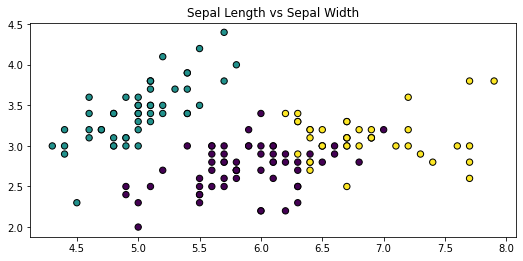

In [12]:
# Plotting the dataset
plt.figure(figsize=(7.50, 3.50))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
plt.subplot(111)
plt.title("Sepal Length vs Sepal Width", fontsize="12")
plt.scatter(iris_df['sepal_length'], iris_df['sepal_width'], marker="o", c=iris_AC.labels_, s=40, edgecolor="k")
plt.show()

## **K-means**

K-Means is a popular clustering algorithm used in unsupervised machine learning. The goal of clustering is to group similar data points together based on their features or attributes. K-Means is a centroid-based algorithm, meaning it tries to find centroids or cluster centers that are representative of the data points in each cluster.

In [13]:
#model
iris_kmeans = KMeans(
     init="random",
     n_clusters=3,
     n_init=10,
     max_iter=300,
    random_state=42
 )

In [14]:
iris_kmeans.fit(iris_df)

# Statistics from the initialization run with the lowest SSE 
#    are available as attributes of iris_kmeans after calling .fit():
    
# The lowest SSE value
print('The lowest SSE value')
print(iris_kmeans.inertia_)

# Final locations of the centroid
print('Final locations of the centroids')
print(iris_kmeans.cluster_centers_)

# The number of iterations required to converge
print('The number of iterations required to converge')
print(iris_kmeans.n_iter_)

# The cluster assignments
print('The cluster assignments')
print(iris_kmeans.labels_)

The lowest SSE value
78.85144142614601
Final locations of the centroids
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
The number of iterations required to converge
6
The cluster assignments
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


#### **Plotting IRIS Kmeans**

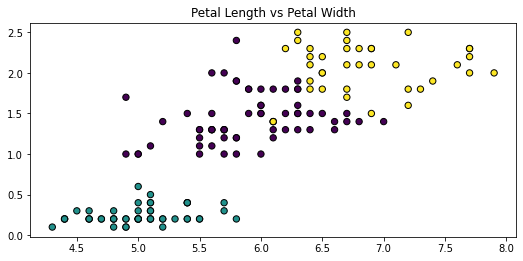

In [15]:
# Plotting the dataset
plt.figure(figsize=(7.50, 3.50))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
plt.subplot(111)
plt.title("Petal Length vs Petal Width", fontsize="12")
plt.scatter(iris_df['sepal_length'], iris_df['petal_width'], marker="o", c=iris_kmeans.labels_, s=40, edgecolor="k")
plt.show()

#### **Silhouette coefficient**

In [16]:
score = silhouette_score(iris_df, iris_kmeans.labels_)
print("Silhouette coefficient score: "+ str(score))

Silhouette coefficient score: 0.5528190123564095


In [17]:
# evaluating clustering by comparing with true labels

ari_kmeans = adjusted_rand_score(iris_y, iris_kmeans.labels_)

ari_k = round(ari_kmeans, 2)
print('adjusted rand index (ARI) for KMeans:')
print(ari_k)

adjusted rand index (ARI) for KMeans:
0.73


## **DBSCAN**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm used in unsupervised machine learning. The algorithm is based on the idea that clusters are dense regions of data points that are separated by areas of lower density.

In [18]:
iris_dbscan = DBSCAN(
    eps=0.8,
    min_samples=5
)

In [19]:
iris_dbscan.fit(iris_df)

DBSCAN(eps=0.8)

#### **Plotting IRIS DBSCAN**

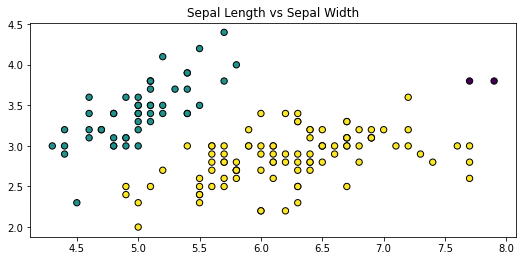

In [20]:
# Plotting the dataset
plt.figure(figsize=(7.50, 3.50))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
plt.subplot(111)
plt.title("Sepal Length vs Sepal Width", fontsize="12")
plt.scatter(iris_df['sepal_length'], iris_df['sepal_width'], marker="o", c=iris_dbscan.labels_, s=40, edgecolor="k")
plt.show()

#### **Silhouette coefficient**

In [21]:
iris_dbscan_score = silhouette_score(iris_df, iris_dbscan.labels_)
print(f"Silhouette Coefficient DBSCAN: {iris_dbscan_score}")

Silhouette Coefficient DBSCAN: 0.5121107753649307


In [22]:
# evaluating clustering by comparing with true labels
ari_dbscan = adjusted_rand_score(iris_y, iris_dbscan.labels_)

ari_d = round(ari_dbscan, 2)
print('adjusted rand index (ARI) for DBSCAN:')
print(ari_d)

adjusted rand index (ARI) for DBSCAN:
0.56


# **Kmeans vs. DBSCAN**

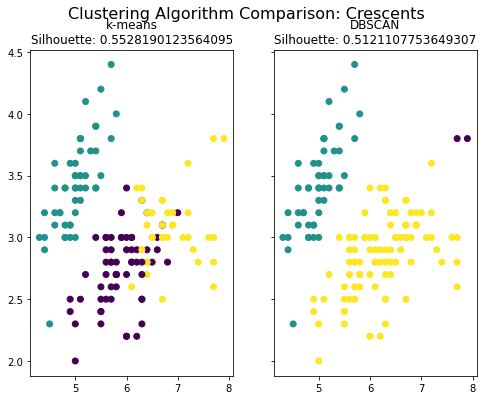

In [23]:
# Plot the dfiris_df and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
     1, 2, figsize=(8, 6), sharex=True, sharey=True
 )
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
     0: "#008fd5",
    1: "#fc4f30",
 }
# The k-means plot
ax1.scatter(iris_df['sepal_length'],iris_df['sepal_width'], c=iris_kmeans.labels_)
ax1.set_title(
   f"k-means\nSilhouette: {silhouette_score(iris_df, iris_kmeans.labels_)}", fontdict={"fontsize": 12}
)

# The dbscan plot
ax2.scatter(iris_df['sepal_length'],iris_df['sepal_width'], c=iris_dbscan.labels_)
ax2.set_title(
     f"DBSCAN\nSilhouette: {iris_dbscan_score}", fontdict={"fontsize": 12}
 )
plt.show()

## **Iris results**

The silhouette coefficient is a metric used to evaluate the quality of clustering results. It measures how similar a data point is to its own cluster compared to other clusters. The value of the silhouette coefficient ranges from -1 to 1, where a score closer to 1 indicates a well-clustered point, a score around 0 indicates that the point is on the border between two clusters, and a score closer to -1 indicates that the point may be assigned to the wrong cluster.

| Model                   | Result |
|-------------------------|--------|
| Aglomerative Clustering | 0.5543 |
| Kmeans                  | 0.5528 |
| DBSCAN                  | 0.5121 |

We can see that the silhouette coefficient for Agglomerative Clustering is 0.5543, which is slightly higher than the silhouette coefficient for K-Means at 0.5528. Both Agglomerative Clustering and K-Means have relatively high silhouette coefficients, indicating that the clustering results for both algorithms are of good quality.
On the other hand, the silhouette coefficient for DBSCAN is 0.5121, which is the lowest among the three algorithms. This suggests that the clustering results produced by DBSCAN may be less accurate than those produced by Agglomerative Clustering and K-Means.

# **MALL CUSTOMERS**

## **Loads a data set**

In [24]:
mall = pd.read_csv('Mall_Customers.csv')
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
my_mall = mall[['Annual Income (k$)','Spending Score (1-100)']]
my_mall.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [26]:
mall = mall.drop(["CustomerID", "Gender"], axis = 1)

### **MALL plottings**

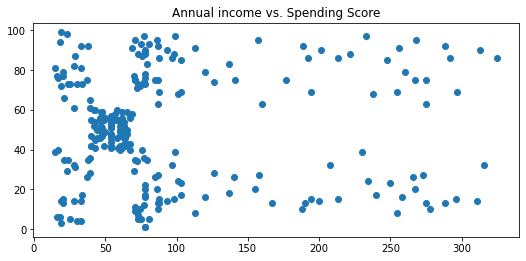

In [27]:
# Plotting the dataset
plt.figure(figsize=(7.50, 3.50))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
plt.subplot(111)
plt.title("Annual income vs. Spending Score", fontsize="12")
plt.scatter(mall['Annual Income (k$)'], mall['Spending Score (1-100)'])
plt.show()

### **Mall dendrogram**

Text(0, 0.5, 'Euclidean distance')

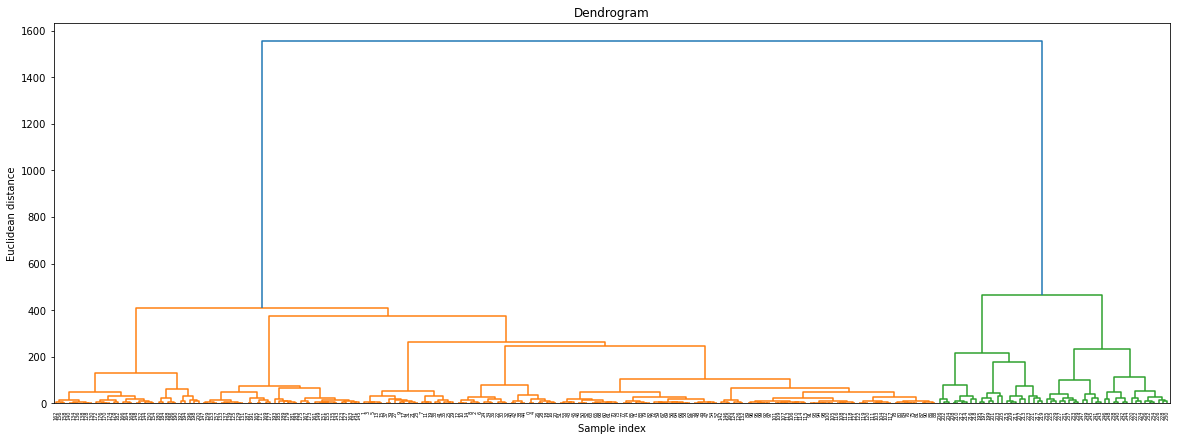

In [28]:
# Plot dendrogram
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  

# Create dendrogram
sc.dendrogram(sc.linkage(mall[['Annual Income (k$)','Spending Score (1-100)']], method='ward'))

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

We generate a dendrogram using the dendrogram function from the scipy.cluster.hierarchy module, which takes as input the linkage matrix and some optional parameters to control the appearance of the dendrogram. The resulting dendrogram shows the hierarchical structure of the MALL CUSTOMERS dataset, with the samples grouped into clusters based on their similarity

## **Agglomerative Clustering**

In [29]:
Agg_hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = Agg_hc.fit_predict(my_mall) # model fitting on the dataset

In [54]:
score = silhouette_score(mall, Agg_hc.labels_)
print(f"Silhouette Coefficient DBSCAN: {score}")

Silhouette Coefficient DBSCAN: 0.3626603235861708


## **K-means**

In [30]:
kmeans = KMeans(
     init="random",
     n_clusters=5,
     n_init=10,
     max_iter=300,
    random_state=42
 )

In [31]:
kmeans.fit(mall)

# Statistics from the initialization run with the lowest SSE 
#    are available as attributes of kmeans after calling .fit():
    
# The lowest SSE value
print('The lowest SSE value')
print(kmeans.inertia_)

# Final locations of the centroid
print('Final locations of the centroids')
print(kmeans.cluster_centers_)

# The number of iterations required to converge
print('The number of iterations required to converge')
print(kmeans.n_iter_)

# The cluster assignments
print('The cluster assignments')
print(kmeans.labels_)

The lowest SSE value
231789.73518341617
Final locations of the centroids
[[ 36.65       178.7         46.7       ]
 [ 37.16129032 269.32258065  51.77419355]
 [ 32.69230769  86.53846154  82.12820513]
 [ 40.62162162  85.64864865  18.64864865]
 [ 40.32520325  44.15447154  49.82926829]]
The number of iterations required to converge
7
The cluster assignments
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


#### **Plotting IRIS Kmeans**

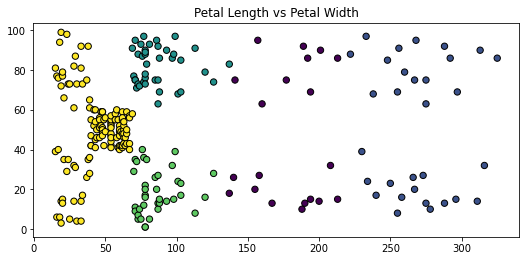

In [32]:
# Plotting the dataset
plt.figure(figsize=(7.50, 3.50))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
plt.subplot(111)
plt.title("Petal Length vs Petal Width", fontsize="12")
plt.scatter(mall["Annual Income (k$)"], mall["Spending Score (1-100)"], marker="o", c=kmeans.labels_, s=40, edgecolor="k")
plt.show()

#### **Silhouette coefficient**

In [33]:
score = silhouette_score(mall, kmeans.labels_)
print("Silhouette coefficient score: "+ str(score))

Silhouette coefficient score: 0.378295142603469


## **K-means Elbow method**

The K-Means Elbow Method is a technique used to determine the optimal number of clusters for a K-Means clustering algorithm. The method works by plotting the within-cluster sum of squares (WCSS) as a function of the number of clusters used in the algorithm. The WCSS is the sum of the squared distances between each data point and its assigned centroid.

The idea behind the Elbow Method is to look for the "elbow" point in the plot, which is the point where the decrease in WCSS begins to level off. This point indicates the optimal number of clusters, as adding more clusters beyond this point would not significantly decrease the WCSS and may even increase it due to overfitting.

In [34]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
 }

In [35]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    #  uses Python’s dictionary unpacking operator (**) to iterate through a dictionary
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(mall)
    sse.append(kmeans.inertia_)

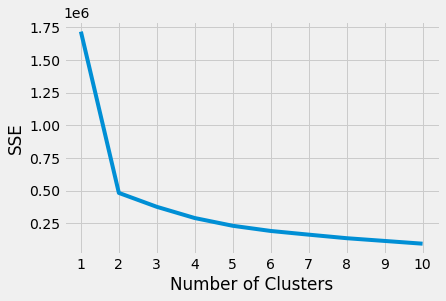

In [36]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [37]:
# locate elbow

kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
 )

print(f"Elbow at: {kl.elbow}")

Elbow at: 2


In [38]:
#  using silhouette coefficient as measure of cluster cohesion and separation
# A list holds the silhouette coefficients for each k

silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(mall)
     score = silhouette_score(mall, kmeans.labels_)
     silhouette_coefficients.append(score)

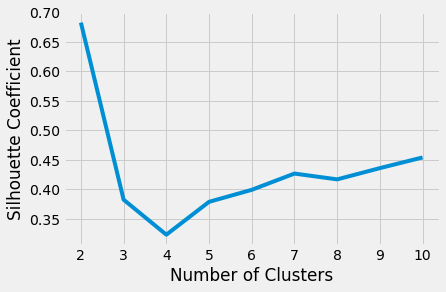

In [39]:
# visualize
     
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## **2 clusters Kmeans**

#### **Now let's take a look at the results of doing 2 clusters just as the elbow method indicated**

In [40]:
mall_kmeans_2 = KMeans(
     init="random",
     n_clusters=2, # We chose 5 clusters in the previous dendogram
     n_init=10,
     max_iter=300,
     random_state=42
)

In [41]:
mall_kmeans_2.fit(mall)

KMeans(init='random', n_clusters=2, random_state=42)

#### **Silhouette coefficient**

In [42]:
mall_kmeans_score_2 = silhouette_score(mall, mall_kmeans_2.labels_)
print(f"Silhouette Coefficient KMEANS: {mall_kmeans_score_2}")

Silhouette Coefficient KMEANS: 0.682179623671337


**We notice the silhoutte coefficient score increases from 0.3782 with 5 clusters to 0.6821 with 2 clusters**

#### **2 clusters kmeans plotting**

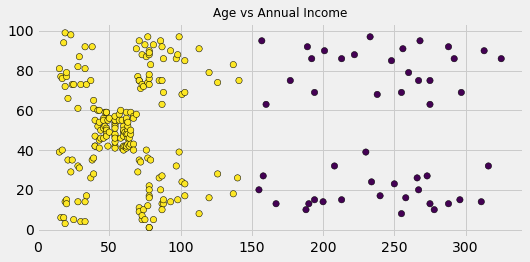

In [43]:
# Plotting the dataset
plt.figure(figsize=(7.50, 3.50))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
plt.subplot(111)
plt.title("Age vs Annual Income", fontsize="12")
plt.scatter(mall['Annual Income (k$)'], mall['Spending Score (1-100)'], marker="o", c=mall_kmeans_2.labels_, s=40, edgecolor="k")
plt.show()

## **DBSCAN**

In [44]:
mall_dbscan = DBSCAN(
    eps=30,
    min_samples=5
)

In [45]:
mall_dbscan.fit(mall)

DBSCAN(eps=30)

#### **Silhouette coefficient**

In [46]:
mall_dbscan_score = silhouette_score(mall, mall_dbscan.labels_)
print(f"Silhouette Coefficient DBSCAN: {mall_dbscan_score}")

Silhouette Coefficient DBSCAN: 0.5134976529017258


#### **DBSCAN plotting**

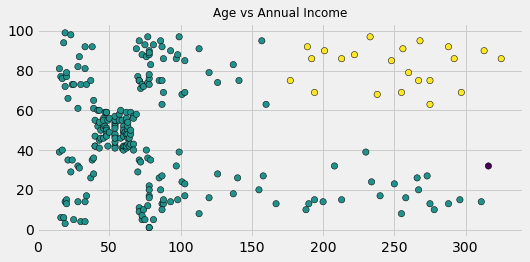

In [47]:
# Plotting the dataset
plt.figure(figsize=(7.50, 3.50))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
plt.subplot(111)
plt.title("Age vs Annual Income", fontsize="12")
plt.scatter(mall['Annual Income (k$)'], mall['Spending Score (1-100)'], marker="o", c=mall_dbscan.labels_, s=40, edgecolor="k")
plt.show()

## **Agglomerative Clustering**

In [48]:
mall_AC = AgglomerativeClustering(
    n_clusters=5,
    affinity='euclidean',
    linkage='ward'
    )

In [49]:
mall_AC.fit(mall)

AgglomerativeClustering(n_clusters=5)

In [50]:
score = silhouette_score(mall, mall_AC.labels_)
print(f"Silhouette Coefficient Aglomerative CLustering: {score}")

Silhouette Coefficient Aglomerative CLustering: 0.36217835705669255


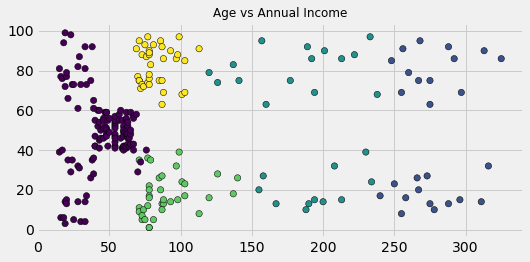

In [51]:
# Plotting the dataset
plt.figure(figsize=(7.50, 3.50))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)
plt.subplot(111)
plt.title("Age vs Annual Income", fontsize="12")
plt.scatter(mall['Annual Income (k$)'], mall['Spending Score (1-100)'], marker="o", c=mall_AC.labels_, s=40, edgecolor="k")
plt.show()

# **Kmeans vs. DBSCAN**

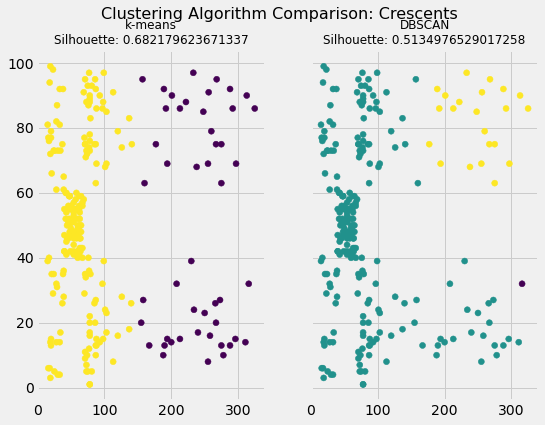

In [52]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
     1, 2, figsize=(8, 6), sharex=True, sharey=True
 )
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
     0: "#008fd5",
    1: "#fc4f30",
 }
# The k-means plot
ax1.scatter(mall['Annual Income (k$)'], mall['Spending Score (1-100)'], c=mall_kmeans_2.labels_)
ax1.set_title(
   f"k-means\nSilhouette: {mall_kmeans_score_2}", fontdict={"fontsize": 12}
)

# The dbscan plot
ax2.scatter(mall['Annual Income (k$)'], mall['Spending Score (1-100)'], c=mall_dbscan.labels_)
ax2.set_title(
     f"DBSCAN\nSilhouette: {mall_dbscan_score}", fontdict={"fontsize": 12}
 )
plt.show()

## **MALL Customers results**

| Model                   | Silhouette coefficient |
|-------------------------|------------------------|
| Aglomerative Clustering | 0.3626                 |
| Kmeans                  | 0.3782                 |
| DBSCAN                  | 0.5134                 |

Looking at the results table, we can see that the Silhouette coefficient for DBSCAN is the highest with a value of 0.5134, followed by K-Means with 0.3782, and Agglomerative Clustering with the lowest Silhouette coefficient of 0.3626.

The Silhouette coefficient measures how well-defined the clusters are in a clustering algorithm. A higher Silhouette coefficient indicates that the clusters are well-separated and distinct, while a lower coefficient suggests that the clusters may be overlapping or poorly defined.

Based on these results, we can conclude that DBSCAN produced the best quality clusters in this particular dataset, as indicated by its highest Silhouette coefficient. K-Means also produced reasonable clustering results, with a relatively high Silhouette coefficient of 0.3782. However, Agglomerative Clustering produced the lowest Silhouette coefficient, indicating that its clustering results may not be as accurate as those produced by the other two algorithms.